# PROJECT NAME: U.S. HEALTH INSURANCE

#Introduction: 


Social insurance is essential for safeguarding social functionality. Because different occupations would result in varying levels of pay and risk, the social insurance for persons is typically created using the characteristics of their line of work. The Ministry of Health and Welfare ensures that citizens receive medical treatment and a basic income for their senior years. As a result, the Ministry of Health and Welfare manages and finances numerous social insurance programs, including the National Pension Insurance and the Labor Pension Insurance, among others. However, as the population ages, many social insurances will experience a pension bankruptcy issue. Unfortunately, the old actuarial approaches rely on numerous hypotheses to compute cash flow, which makes it impossible to anticipate how people will actually pay their bills. Additionally, the majority of conventional actuarial approaches can only anticipate short-term cash flow. As a result, while the time of prediction aim is expanded, the error of conventional actuarial approaches will be greatly increased. We provide a prediction model to help with long-term prediction of people's personal payment behavior. ………. We carry out a thorough experimental investigation using genuine data gathered through. The results show that our approach is substantially more accurate than previous research.An agreement between a person and an insurance company is a health insurance policy. Health insurance has emerged as one of the most important fields of research since the Covid-19 pandemic. The insurer receives regular payments from you (referred to as premiums) in accordance with the terms of the contract, and you receive payment if the sum promised is realized in the event of an unfortunate incident, such as the early death of the life insured, an accident, or damage to a dwelling. We have selected a dataset called "U.S. Health Insurance Dataset" for the term project. There are 1338 entries spread across 7 columns in this dataset.


#Importing Libraries

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,adjusted_rand_score

#Importing dataset

In [4]:
data =pd.read_csv("insurance.csv")

In [5]:
le = LabelEncoder()

In [6]:
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [8]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [9]:
data.isin(['?']).any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [10]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<AxesSubplot: >

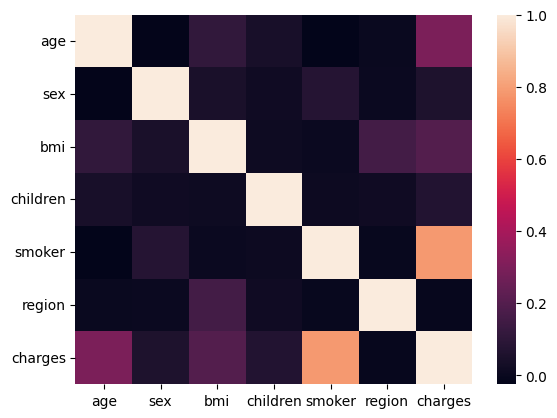

In [13]:
sns.heatmap(data.corr())

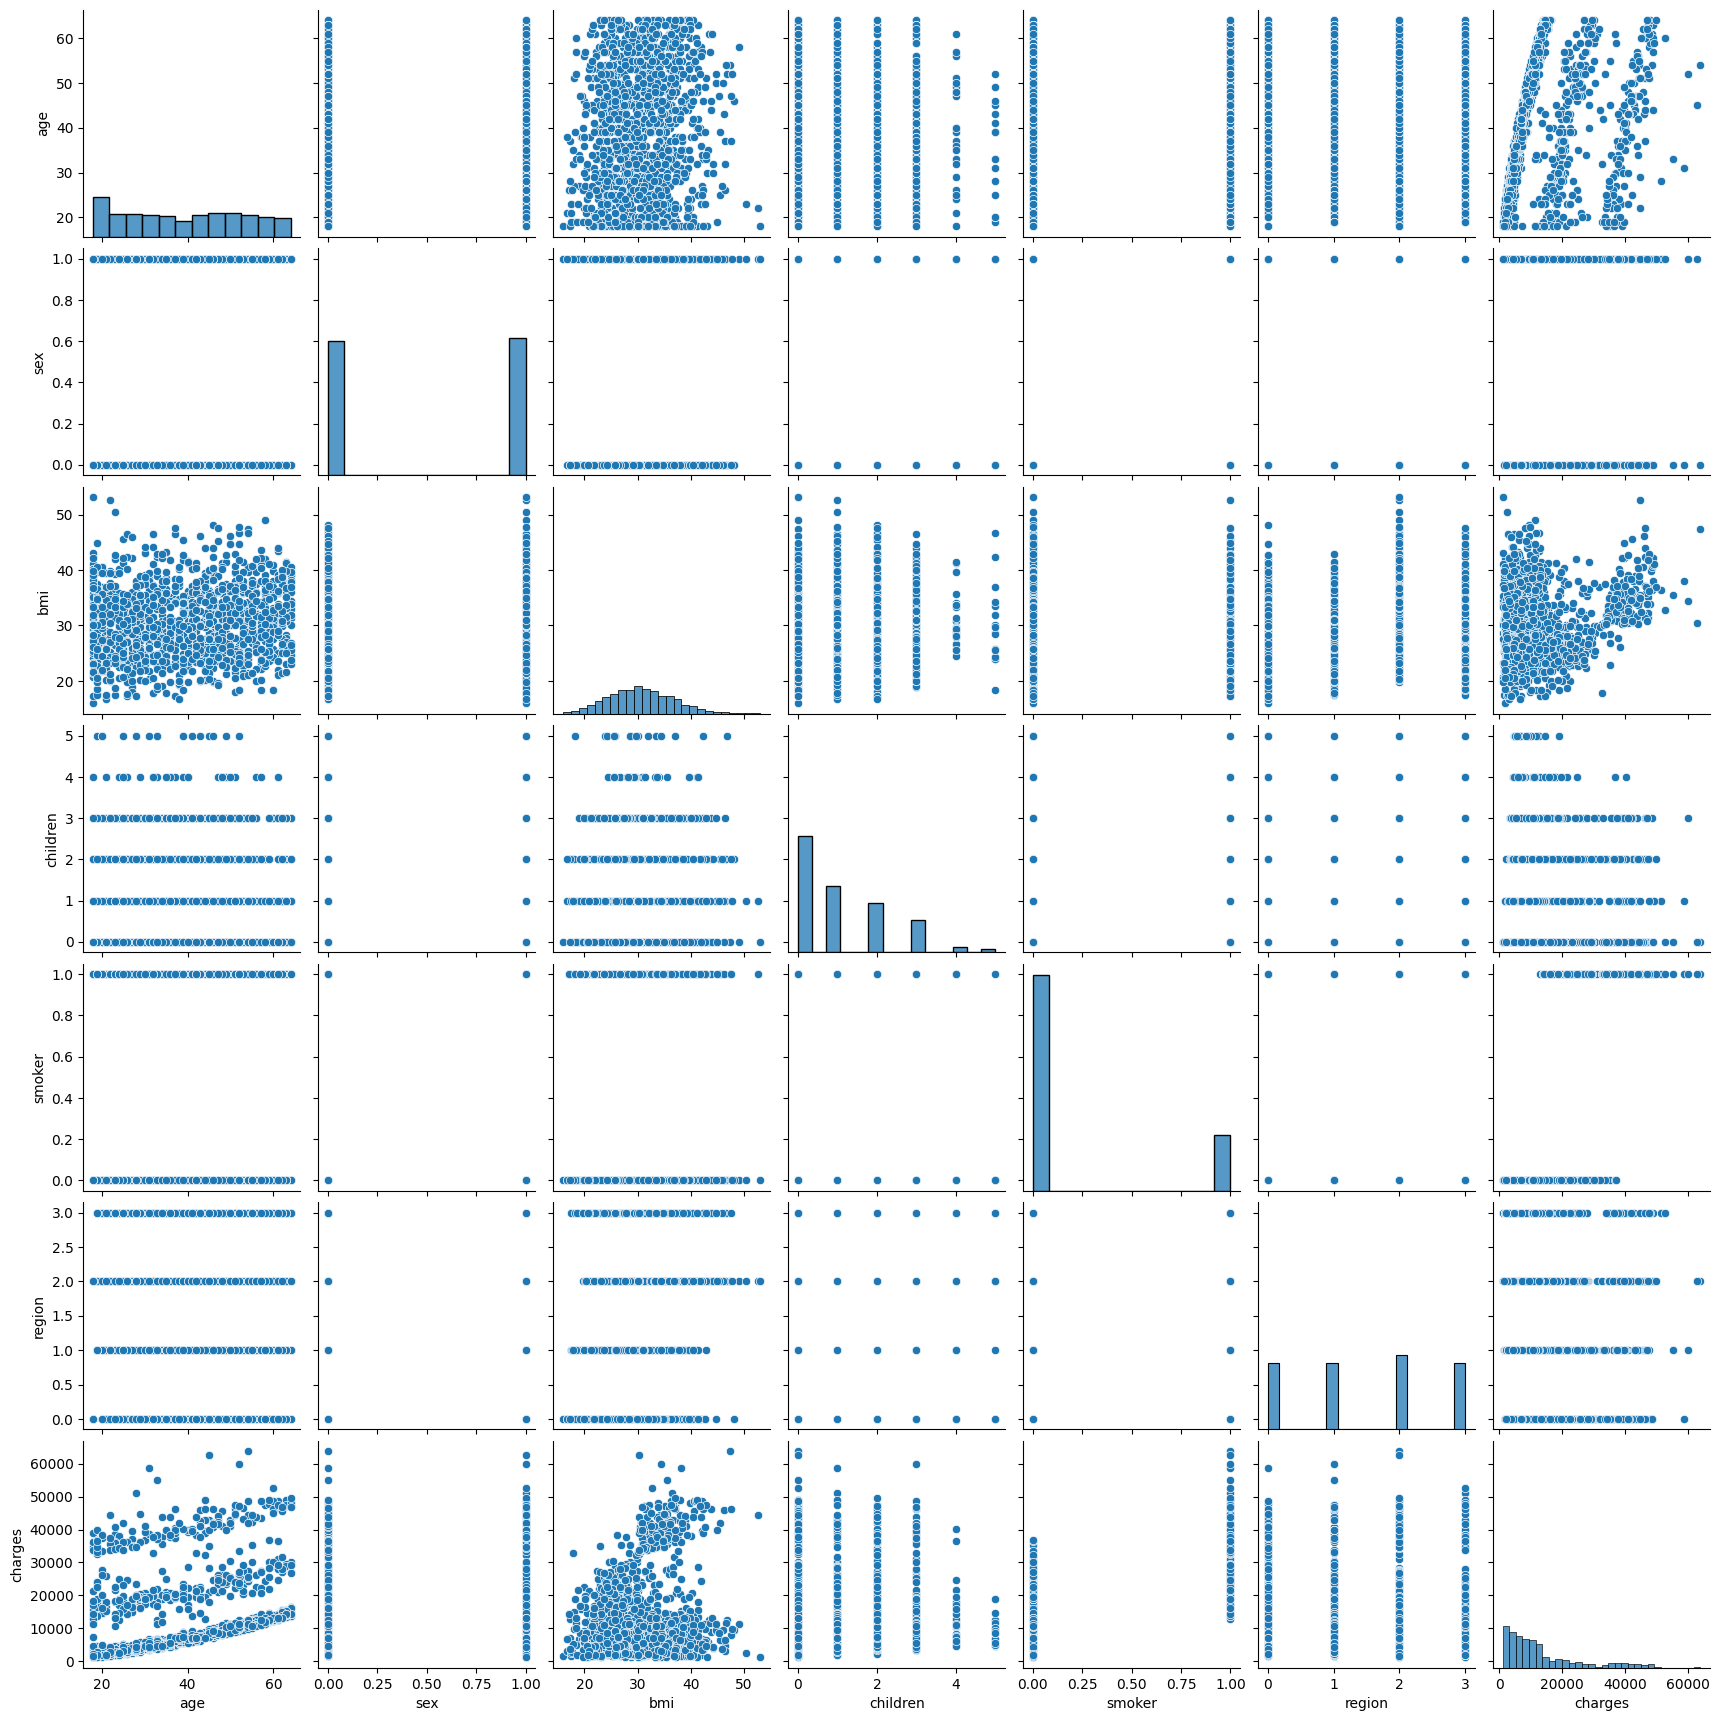

In [14]:
sns.pairplot(data)

In [15]:
X= data.drop(['charges'],axis=1)
y = data['charges']

In [16]:
model = sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1537.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):                        0.00
Time:                        14:42:17   Log-Likelihood:                         -13621.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1332   BIC:                                  2.729e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=6,test_size=0.20)

In [18]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [19]:
print('r2 score:',r2_score(y_test,y_predict))

r2 score: 0.7785295914318423


RESULT:
•	R-value: represents the correlation between the observed values and the predicted values of the target value
•	R square is used to determine how well the predictor variables can predict the target value.
•	0.7785295914318423 or 77.85%
•	With a High R-square value, we can confirm that our predicted model is a good prediction model as we have a 77.85% of R-Square value.
